# Identificação

Nome: Guilherme Holanda Sanches  
NUSP:10734370


## Etapa 1: Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.ensemble import RandomForestRegressor
#Importe aqui os modelos não paramétricos


## Etapa 2: Carregamento da base de dados

In [ ]:
df = pd.read_csv('./sample_data/petro.csv', delimiter=',', parse_dates=True, infer_datetime_format=True, index_col='Date', )

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,27.500000,27.580000,26.91,27.000000,19.787769,22738500.0
2011-01-04,27.010000,27.059999,26.40,26.900000,19.714476,30936600.0
2011-01-05,26.680000,27.350000,26.58,27.219999,19.949003,24306800.0
2011-01-06,27.200001,27.459999,27.01,27.110001,19.868389,24328800.0
2011-01-07,27.020000,27.180000,26.73,26.730000,19.589888,17453800.0


# Separe conjunto X e y - Teste e Treino

Sugestão: y = o valor do fechamento do preço diário (close)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,27.500000,27.580000,26.910000,27.000000,19.787769,22738500.0
2011-01-04,27.010000,27.059999,26.400000,26.900000,19.714476,30936600.0
2011-01-05,26.680000,27.350000,26.580000,27.219999,19.949003,24306800.0
2011-01-06,27.200001,27.459999,27.010000,27.110001,19.868389,24328800.0
2011-01-07,27.020000,27.180000,26.730000,26.730000,19.589888,17453800.0
...,...,...,...,...,...,...
2021-10-25,27.760000,29.309999,27.650000,29.040001,29.040001,135830600.0
2021-10-26,28.799999,29.230000,28.600000,28.760000,28.760000,57865600.0
2021-10-27,28.830000,29.059999,28.469999,28.690001,28.690001,57579200.0


In [ ]:
df2 = df[df['Close'].notna()]
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,27.500000,27.580000,26.910000,27.000000,19.787769,22738500.0
2011-01-04,27.010000,27.059999,26.400000,26.900000,19.714476,30936600.0
2011-01-05,26.680000,27.350000,26.580000,27.219999,19.949003,24306800.0
2011-01-06,27.200001,27.459999,27.010000,27.110001,19.868389,24328800.0
2011-01-07,27.020000,27.180000,26.730000,26.730000,19.589888,17453800.0
...,...,...,...,...,...,...
2021-10-25,27.760000,29.309999,27.650000,29.040001,29.040001,135830600.0
2021-10-26,28.799999,29.230000,28.600000,28.760000,28.760000,57865600.0
2021-10-27,28.830000,29.059999,28.469999,28.690001,28.690001,57579200.0


In [ ]:
X = df2.index.values
y = df2.loc[:, 'Close']

print(X,y)

['2011-01-03T00:00:00.000000000' '2011-01-04T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' ... '2021-10-27T00:00:00.000000000'
 '2021-10-28T00:00:00.000000000' '2021-10-29T00:00:00.000000000'] Date
2011-01-03    27.000000
2011-01-04    26.900000
2011-01-05    27.219999
2011-01-06    27.110001
2011-01-07    26.730000
                ...    
2021-10-25    29.040001
2021-10-26    28.760000
2021-10-27    28.690001
2021-10-28    28.959999
2021-10-29    27.150000
Name: Close, Length: 2676, dtype: float64


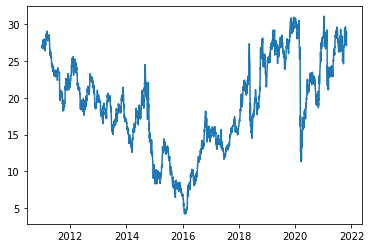

In [ ]:
plt.plot(y)

In [ ]:

from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train = X[:int(len(X)*(70/100))]
y_train = y[:int(len(y)*(70/100))]
print('Train: ',len(X_train))



Train:  1873


In [ ]:
X_train = X_train.reshape(-1,1)

Date
2011-01-03    27.000000
2011-01-04    26.900000
2011-01-05    27.219999
2011-01-06    27.110001
2011-01-07    26.730000
                ...    
2018-07-11    17.410000
2018-07-12    17.950001
2018-07-13    18.110001
2018-07-16    17.879999
2018-07-17    18.290001
Name: Close, Length: 1873, dtype: float64

In [ ]:
y_train


Date
2011-01-03     3.557595
2011-01-04     3.583006
2011-01-05     3.642300
2011-01-06     3.650770
2011-01-07     3.735474
                ...    
2018-07-19    21.980858
2018-07-20    22.226500
2018-07-23    22.692379
2018-07-24    23.200600
2018-07-25          NaN
Name: Adj Close, Length: 1880, dtype: float64

# Previsões com Modelos Não Paramétricos

In [ ]:

#Material

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

#  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train.values)
#melb_preds = forest_model.predict(val_X)

RandomForestRegressor()

In [ ]:
pred = X_train[0]

print(forest_model.predict([pred]))

[26.99129998]


In [ ]:
X_test = X[int(len(X)*(70/100)):]
X_test = X_test.reshape(-1,1)

y_test = y[int(len(X)*(70/100)):]
y_test

Date
2018-07-18    18.049999
2018-07-19    18.400000
2018-07-20    19.290001
2018-07-23    19.260000
2018-07-24    19.660000
                ...    
2021-10-25    29.040001
2021-10-26    28.760000
2021-10-27    28.690001
2021-10-28    28.959999
2021-10-29    27.150000
Name: Close, Length: 803, dtype: float64

In [ ]:
predicoes = forest_model.predict(X_test)

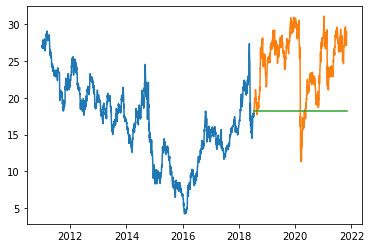

In [ ]:
plt.plot(y_train, label='Test')
plt.plot(y_test)
plt.plot(pd.DataFrame(data= predicoes,index=X_test))


# Cross Validation for Time-series

Desafio: Opcional




In [ ]:
print(df.shape)

step = 1
fold1 = int(df.shape[0]*0.3) #1º passo: começa com 30% dos dados treinados.

for x in range(fold1, df.shape[0]):
  
  ini_treino = 0
  fim_treino = x

  print("Passo: ", x - fold1 + 1)
  #dados para treinamento
  print(df.iloc[ini_treino: fim_treino, ].values)

  #dados para teste
  print(df.iloc[fim_treino:fim_treino + step, ].values)

  #Inseri apenas para não mostrar todas etapas de previsão
  if x == fold1 + 2:
    break

  #model.fit

  #model.predict

  # MAPE 

